In [20]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    print(roc.head)
    print(roc_t)
    
    return list(roc_t['threshold']) 

In [2]:
def cutoff_youdens_j(fpr, tpr, thresholds):
    j_scores = tpr-fpr # J = sensivity (=tpr) + specificity (=1-fpr) - 1
    j_ordered = sorted(zip(j_scores, thresholds))
    return j_ordered[-1][1]

In [22]:
def adapted_cutoff_youdens_j(fpr, tpr, thresholds):
    i = np.arange(len(tpr)) 
    j_scores = tpr-fpr # J = sensivity + specificity - 1
    ad_j = tpr-(1-fpr)
    j_ordered = sorted(zip(np.abs(ad_j), thresholds))
    return j_ordered[-1][1]

In [12]:
import numpy as np
from sklearn.metrics import roc_curve

X = np.arange(1, 10)
Y = X < 5

X = -X
fpr, tpr, thresholds = roc_curve(Y, X)
T = cutoff_youdens_j(fpr, tpr, thresholds)
print(T)

-4


Area under the ROC curve : 0.000000
<bound method NDFrame.head of          tf  threshold
0 -1.000000       10.8
1 -0.958333        9.8
2  0.000000        5.2
3  1.000000        1.0>
    tf  threshold
2  0.0        5.2
[5.199999999999999]
nom 10.799999999999997
10.799999999999997


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[]

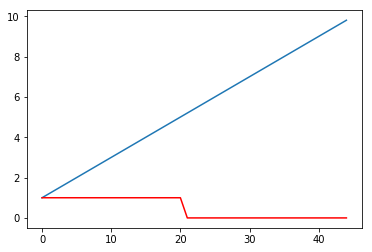

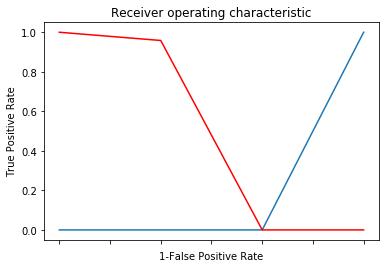

In [25]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd
import pylab as pl

X = np.arange(1, 10, 0.2)
Y = X < 5

fig, ax = pl.subplots()
pl.plot(X)
pl.plot(Y, color = 'red')


fpr, tpr, thresholds =roc_curve(Y, X)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


print(Find_Optimal_Cutoff(Y, X))
optimal_idx = np.argmin(np.abs(tpr - fpr))
optimal_threshold = thresholds[optimal_idx]
print('nom', optimal_threshold)

print(adapted_cutoff_youdens_j(fpr, tpr, thresholds))

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])